In [1]:
import torch
from rassp import netutil
from rassp.msutil.masscompute import FragmentFormulaPeakEnumerator

from rdkit import Chem
import matchms
import pandas as pd
import numpy as np

import matchms
from matchms.plotting import plot_spectra_mirror

import matplotlib.pyplot as plt


In [2]:
valid_atoms = {1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 35, 53}
num_peaks_per_formula = 12
max_formulae = 100000

ffe = FragmentFormulaPeakEnumerator(sorted(valid_atoms), use_highres=True, max_peak_num=num_peaks_per_formula)

def goodmol(mol):
        if len(mol.GetAtoms()) > 48:
            return False
        
        atoms = { a.GetAtomicNum() for a in mol.GetAtoms() }
        if not atoms < valid_atoms:
            return False
            
        f,m = ffe.get_frag_formulae(mol)
        if len(f) > max_formulae:
            return False

        return True


In [3]:
test = pd.read_parquet('test.pq')

In [4]:
def molsize(mols):
    out = []
    for m in mols:
        mm = Chem.AddHs(Chem.Mol(m))
        out.append(len(mm.GetAtoms()))
    return pd.Series(out,name='atoms')

In [10]:
stest = test.sort_values('rdmol',key=molsize)
stest

,rdmol,spect,smiles
16,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 46.96], [16.0, 16.98], [28.0, 999.0], ...",[C-]#[O+]
19,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 136.88], [28.0, 999.0], [29.0, 6.99]]",N#N
28,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 108.9], [16.0, 24.98], [30.0, 999.0], ...",[N]=O
1176,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[79.0, 449.59], [80.0, 999.0], [81.0, 438.6],...",Br
27029,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[26.0, 1.0], [27.0, 1.0], [28.0, 1.0], [29.0,...",[H+].[Br-]
...,...,...,...
6754,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 10.99], [15.0, 167.85], [16.0, 8.99], ...",CC(=O)C1CCCC1
6755,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 1.0], [13.0, 1.0], [14.0, 10.99], [15....",CC1CCC(=O)CC1
6761,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[14.0, 4.0], [15.0, 17.98], [17.0, 4.0], [18....",CC1CCCCC1=O
6726,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[13.0, 6.99], [14.0, 31.97], [15.0, 131.88], ...",C1CC1C(C2CC2)O


In [11]:
stest = stest.iloc[range(0,len(stest),40)]
stest

,rdmol,spect,smiles
16,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 46.96], [16.0, 16.98], [28.0, 999.0], ...",[C-]#[O+]
15227,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 58.95], [13.0, 1.0], [14.0, 5.0], [23....",C(#N)C(Cl)(Cl)Cl
9100,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 42.96], [13.0, 88.92], [14.0, 189.83],...",CC(=O)Br
1706,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[12.0, 1.0], [13.0, 2.0], [24.0, 3.0], [25.0,...",C1=CSC=N1
416,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[27.0, 52.95], [28.0, 4.0], [31.0, 32.97], [3...",CC(F)F
...,...,...,...
19723,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[30.0, 27.97], [31.0, 42.96], [38.0, 40.96], ...",C1C(ON=C1C(=O)NN)CO
27852,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[52.0, 31.97], [53.0, 70.94], [54.0, 236.79],...",C(CO)N1C2=NON=C2C(=O)NC1=O
29069,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[41.0, 12.99], [42.0, 7.99], [43.0, 5.99], [4...",C1=CC(=CC=C1N2C(=O)C=CC2=O)Cl
6808,b'\xef\xbe\xad\xde\x00\x00\x00\x00\r\x00\x00\x...,"[[37.0, 3.0], [38.0, 7.99], [39.0, 164.85], [4...",CC1CCC(C1=O)C


In [7]:
use_gpu=True

# nic moc, cossim kolem 0.65
#model='zia5/test.79149399.00000000.model'
#meta='zia5/test.79149399.meta'

model='zia5/test.79068385.00000000.model'
meta='zia5/test.79068385.meta'



if use_gpu and not torch.cuda.is_available():
    use_gpu = False

predictor = netutil.PredModel(
    meta,
    model,
    USE_CUDA=use_gpu,
    data_parallel=False,
)


In [12]:
valid_mols = [ Chem.AddHs(Chem.Mol(m)) for m in stest.rdmol ]

In [13]:
predictions = predictor.pred(
    valid_mols,
    progress_bar=True,
    normalize_pred=True,
    output_hist_bins=True,
    batch_size=1, # XXX
    dataloader_config={
        'pin_memory': False,
        'num_workers': 0, # XXX
        'persistent_workers': False,
    },
    benchmark_dataloader=False,
)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 180/180 [00:41<00:00, 4.32it/s]


In [14]:
pred = predictions['pred_binned']

In [15]:
true = [ np.stack(list(t)) for t in stest.spect ]
len(true)

180

In [16]:
def to_matchms_spec(s):
    return matchms.Spectrum(mz=s[:,0].astype(float),intensities=s[:,1].astype(float))

2023-03-27 19:24:32,484:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:24:32,484 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-27 19:24:32,486:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-27 19:24:32,486 - matchms - WARNING - No precursor_mz found in metadata.


<Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>

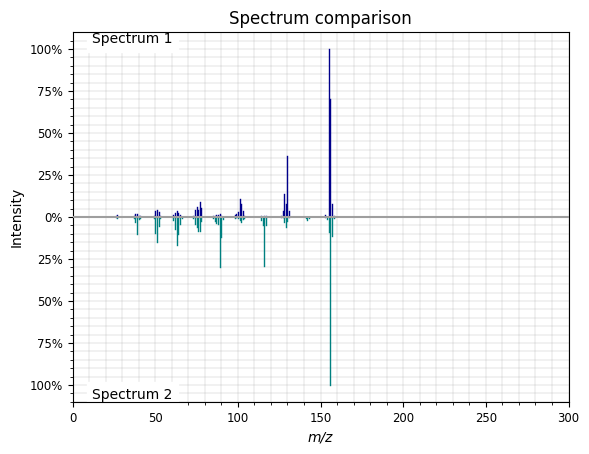

In [107]:
i=716
st = to_matchms_spec(true[i])
sp = to_matchms_spec(pred[i])
plot_spectra_mirror(st,sp)

In [17]:
#sim = matchms.similarity.CosineGreedy()
sim = matchms.similarity.CosineHungarian(mz_power=3., intensity_power=.6)

scores = [ sim.pair(to_matchms_spec(true[i]),to_matchms_spec(pred[i])) for i in range(len(true)) ]

2023-03-28 11:13:12,494:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,494 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,496:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,496 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,946:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,946 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,947:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,947 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,949:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,949 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,949:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,949 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,950:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,950 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,951:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,951 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,951:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,951 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,952:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,952 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,953:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,953 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,954:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,954 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,954:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,954 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,955:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,955 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,956:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,956 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,956:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,956 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,957:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,957 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,958:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,958 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,959:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,959 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,959:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,959 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,960:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,960 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,961:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,961 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,961:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,961 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,962:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,962 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,962:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,962 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,963:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,963 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,964:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,964 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,964:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,964 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,965:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,965 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,965:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,965 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,966:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,966 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,966:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,966 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,969:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,969 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,970:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,970 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,970:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,970 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,971:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,971 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,972:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,972 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,972:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,972 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,973:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,973 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,974:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,974 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,974:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,974 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,975:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,975 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,976:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,976 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,977:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,977 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,978:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,978 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,978:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,978 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,979:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,979 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,979:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,979 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,981:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,981 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,981:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,981 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,982:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,982 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,983:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,983 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,983:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,983 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,984:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,984 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,986:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,986 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,986:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,986 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,987:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,987 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,987:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,987 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,988:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,988 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,988:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,988 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,990:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,990 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,991:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,991 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,991:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,991 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,992:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,992 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,992:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,992 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,993:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,993 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,994:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,994 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,994:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,994 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,996:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,996 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,997:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,997 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,997:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,997 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,998:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,998 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,998:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,998 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:12,999:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:12,999 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,001:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,001 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,001:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,001 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,002:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,002 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,003:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,003 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,003:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,003 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,004:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,004 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,005:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,005 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,006:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,006 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,007:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,007 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,007:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,007 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,008:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,008 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,008:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,008 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,010:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,010 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,010:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,010 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,011:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,011 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,012:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,012 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,013:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,013 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,013:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,013 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,015:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,015 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,015:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,015 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,016:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,016 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,016:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,016 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,017:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,017 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,017:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,017 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,019:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,019 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,020:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,020 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,021:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,021 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,022:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,022 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,023:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,023 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,023:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,023 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,025:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,025 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,025:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,025 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,026:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,026 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,027:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,027 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,028:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,028 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,028:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,028 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,030:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,030 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,030:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,030 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,031:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,031 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,032:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,032 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,033:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,033 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,034:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,034 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,036:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,036 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,036:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,036 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,037:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,037 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,038:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,038 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,040:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,040 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,040:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,040 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,042:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,042 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,043:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,043 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,044:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,044 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,045:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,045 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,046:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,046 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,046:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,046 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,048:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,048 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,048:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,048 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,049:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,049 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,050:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,050 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,051:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,051 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,052:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,052 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,053:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,053 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,054:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,054 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,055:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,055 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,055:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,055 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,057:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,057 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,058:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,058 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,060:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,060 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,060:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,060 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,062:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,062 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,063:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,063 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,064:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,064 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,065:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,065 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,066:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,066 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,066:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,066 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,068:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,068 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,068:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,068 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,070:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,070 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,071:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,071 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,072:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,072 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,073:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,073 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,073:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,073 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,074:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,074 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,075:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,075 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,076:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,076 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,077:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,077 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,078:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,078 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,079:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,079 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,080:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,080 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,081:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,081 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,082:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,082 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,084:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,084 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,084:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,084 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,085:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,085 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,086:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,086 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,088:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,088 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,088:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,088 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,089:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,089 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,090:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,090 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,091:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,091 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,092:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,092 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,093:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,093 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,094:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,094 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,096:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,096 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,096:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,096 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,098:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,098 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,098:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,098 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,099:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,099 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,100:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,100 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,101:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,101 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,102:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,102 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,104:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,104 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,105:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,105 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,106:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,106 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,107:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,107 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,108:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,108 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,109:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,109 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,110:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,110 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,110:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,110 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,111:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,111 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,112:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,112 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,114:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,114 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,114:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,114 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,115:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,115 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,116:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,116 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,118:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,118 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,118:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,118 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,120:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,120 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,120:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,120 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,122:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,122 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,122:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,122 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,124:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,124 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,125:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,125 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,127:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,127 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,128:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,128 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,131:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,131 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,131:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,131 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,133:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,133 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,134:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,134 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,136:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,136 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,136:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,136 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,138:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,138 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,138:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,138 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,140:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,140 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,140:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,140 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,141:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,141 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,142:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,142 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,144:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,144 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,145:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,145 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,146:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,146 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,146:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,146 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,148:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,148 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,148:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,148 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,151:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,151 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,152:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,152 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,152:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,152 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,153:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,153 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,155:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,155 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,155:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,155 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,156:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,156 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,157:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,157 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,158:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,158 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,159:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,159 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,160:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,160 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,161:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,161 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,162:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,162 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,163:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,163 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,164:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,164 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,165:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,165 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,166:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,166 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,167:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,167 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,168:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,168 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,169:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,169 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,170:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,170 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,171:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,171 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,172:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,172 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,173:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,173 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,174:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,174 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,175:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,175 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,176:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,176 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,177:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,177 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,178:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,178 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,178:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,178 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,180:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,180 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,181:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,181 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,182:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,182 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,183:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,183 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,183:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,183 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,184:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,184 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,186:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,186 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,186:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,186 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,188:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,188 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,188:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,188 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,190:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,190 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,190:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,190 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,191:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,191 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,192:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,192 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,193:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,193 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,194:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,194 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,196:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,196 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,197:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,197 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,197:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,197 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,198:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,198 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,200:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,200 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,201:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,201 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,202:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,202 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,203:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,203 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,204:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,204 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,205:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,205 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,206:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,206 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,207:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,207 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,208:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,208 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,209:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,209 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,210:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,210 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,211:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,211 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,212:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,212 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,213:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,213 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,214:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,214 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,214:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,214 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,216:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,216 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,216:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,216 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,218:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,218 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,219:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,219 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,219:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,219 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,220:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,220 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,222:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,222 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,222:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,222 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,223:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,223 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,224:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,224 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,225:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,225 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,226:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,226 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,227:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,227 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,228:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,228 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,229:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,229 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,230:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,230 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,232:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,232 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,232:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,232 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,234:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,234 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,234:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,234 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,236:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,236 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,236:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,236 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,238:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,238 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,238:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,238 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,239:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,239 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,240:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,240 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,242:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,242 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,243:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,243 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,244:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,244 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,245:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,245 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,247:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,247 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,247:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,247 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,249:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,249 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,249:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,249 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,251:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,251 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,251:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,251 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,253:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,253 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,253:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,253 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,254:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,254 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,255:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,255 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,257:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,257 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,257:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,257 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,259:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,259 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,259:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,259 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,261:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,261 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,261:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,261 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,262:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,262 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,263:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,263 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,264:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,264 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,265:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,265 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,266:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,266 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,266:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,266 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,267:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,267 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,268:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,268 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,270:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,270 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,271:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,271 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,272:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,272 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,272:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,272 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,273:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,273 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,274:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,274 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,274:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,274 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,276:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,276 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,277:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,277 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,278:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,278 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,279:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,279 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,280:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,280 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,281:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,281 - matchms - WARNING - No precursor_mz found in metadata.


2023-03-28 11:13:13,281:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


2023-03-28 11:13:13,281 - matchms - WARNING - No precursor_mz found in metadata.


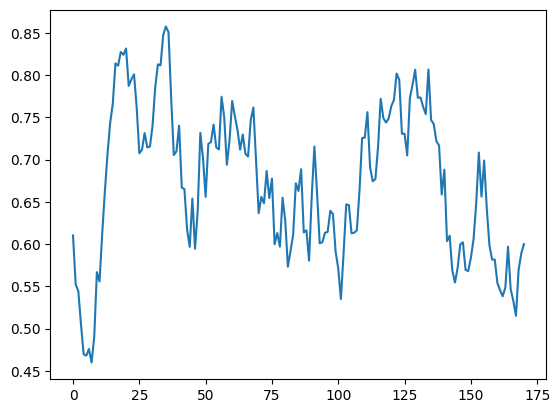

In [19]:
scoresonly = np.array([ float(s['score']) for s in scores ])

smooth = np.convolve(scoresonly, np.ones(10)/10, mode='valid')

plt.plot(smooth)
#plt.plot([ float(s['matches']) for s in scores ])
plt.show()